In [1]:
%matplotlib inline
from goatools.associations import read_ncbi_gene2go
import matplotlib.pyplot as plt
import numpy as np

/Users/nicochaves/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
gene2go_file_path = '../data/gene2go.txt' # If file doesn't exist, then run gene2go = download_ncbi_associations()
rpkm_file_path = '../../CS341_Data/transcript_rpkm_in_go_nonzero_exp.txt'
gene_count_file_path = '../data/supp_GO_term_gene_counts.txt'
biomart_file_path = '../data/biomart_ensembl_to_entrez.txt'

In [32]:
exp_ev_codes = ['EXP', 'IDA', 'IPI', 'IMP', 'IGI', 'IEP']
comp_an_ev_codes = ['ISS', 'ISO', 'ISA', 'ISM', 'IGC', 'IBA', 'IBD', 'IKR', 'IRD', 'RCA']
auth_stmt_ev_codes = ['TAS', 'NAS']
cur_ev_codes = ['IC', 'ND']
elec_ev_codes = ['IEA']

In [13]:
def print_histogram(GO_terms, title, bin_range=range(0,110,10)):
    counts = [len(genes) for (GO_id, genes) in GO_terms]
    plt.hist(counts, bins=bin_range)
    plt.title(title)
    plt.xlabel("# of Genes")
    plt.ylabel("# of GO terms")
    plt.show()

In [4]:
def map_entrez_to_ensembl(path):
    ent_to_ens = {}
    f = open(path)
    for line in f:
        vals = line.split('\t')
        ens_gene_id = vals[0]
        entrez_id = vals[2]
        ent_to_ens[entrez_id] = ens_gene_id

    f.close()
    return ent_to_ens

In [89]:
def get_go_terms(biomart_fpath, gene2go_fpath, gene_count_fpath, ev_codes=None):
    
    entrez_to_ensembl = map_entrez_to_ensembl(biomart_fpath)

    # taxids=[9606] means select only human.
    if ev_codes:
        go_to_entrez_ids_human = read_ncbi_gene2go(gene2go_fpath, taxids=[9606], go2geneids=True, evidence_set=ev_codes)
    else:
        go_to_entrez_ids_human = read_ncbi_gene2go(gene2go_fpath, taxids=[9606], go2geneids=True)
    print("{N} GO terms associated with human NCBI Entrez GeneIDs".format(N=len(go_to_entrez_ids_human)))

    # Get the GO terms
    gene_cnt_file = open(gene_count_fpath)
    GO_ids = []
    atLine = 0
    skipLines = 1
    for line in gene_cnt_file:
        if atLine < skipLines:
            atLine += 1
            continue
        GO_id = line.split('\t')[0]
        entrez_ids = go_to_entrez_ids_human[GO_id]
        #print '# of Entrez IDs associated with ', GO_id, ' = ', len(entrez_ids)
        ensembl_ids = set()
        for ent_id in entrez_ids:
            if str(ent_id) in entrez_to_ensembl:
                ensembl_ids.add(entrez_to_ensembl[str(ent_id)])
        GO_ids.append((GO_id, list(ensembl_ids)))
        #print '# of Ensembl IDs associated with ', GO_id, ' = ', len(ensembl_ids)

    return GO_ids


## All annotations (no filter by evidence)

16439 GO terms associated with human NCBI Entrez GeneIDs
6172


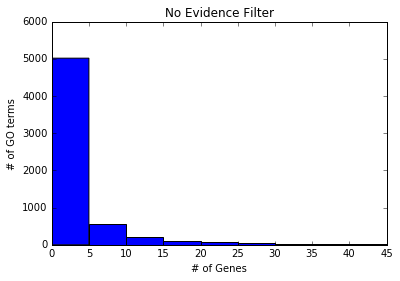

In [90]:
# Get all GO terms from the supplementary file, along with their corresponding ensemble gene IDs.
all_GO_terms = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path)
print len(all_GO_terms)
print_histogram(all_GO_terms, 'No Evidence Filter', bin_range=range(0,50,5))

## Only experimental evidence-based annotations.

10176 GO terms associated with human NCBI Entrez GeneIDs
6172


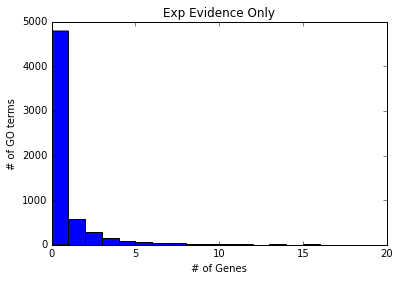

In [91]:
evidence_GO_terms = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=exp_ev_codes)
print len(evidence_GO_terms)
print_histogram(evidence_GO_terms, 'Exp Evidence Only', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis annotations.

12880 GO terms associated with human NCBI Entrez GeneIDs
6172


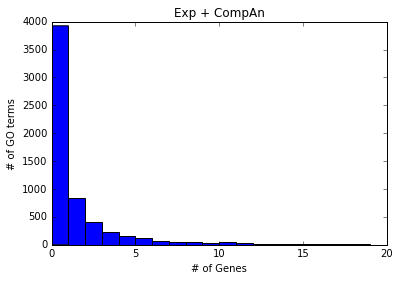

In [92]:
ev_compan_GO_terms = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=exp_ev_codes + comp_an_ev_codes)
print len(ev_compan_GO_terms)
print_histogram(ev_compan_GO_terms, 'Exp + CompAn', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis + Author Statement annotations.

13884 GO terms associated with human NCBI Entrez GeneIDs
6172


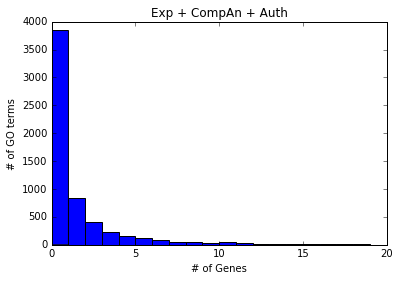

In [93]:
codes = exp_ev_codes + comp_an_ev_codes + auth_stmt_ev_codes
GO_terms_3 = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=codes)
print len(GO_terms_3)
print_histogram(GO_terms_3, 'Exp + CompAn + Auth', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis + Author Statement + Curatorial annotations.

13944 GO terms associated with human NCBI Entrez GeneIDs
6172


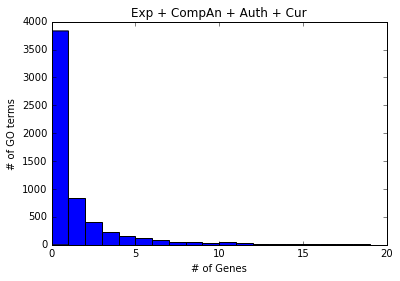

In [94]:
codes = exp_ev_codes + comp_an_ev_codes + auth_stmt_ev_codes + cur_ev_codes
GO_terms_4 = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=codes)
print len(GO_terms_4)
print_histogram(GO_terms_4, 'Exp + CompAn + Auth + Cur', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis + Author Statement + Curatorial + Electronic annotations.

16439 GO terms associated with human NCBI Entrez GeneIDs
6172


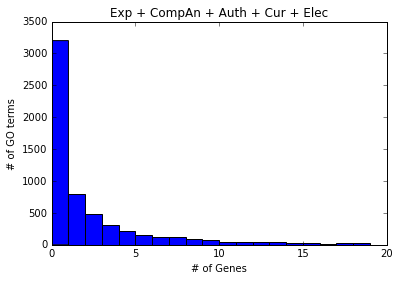

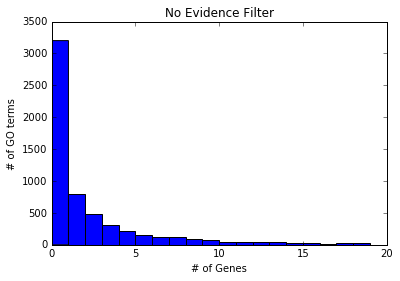

In [95]:
codes = exp_ev_codes + comp_an_ev_codes + auth_stmt_ev_codes + cur_ev_codes + elec_ev_codes
GO_terms_5 = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=codes)
print len(GO_terms_5)
print_histogram(GO_terms_5, 'Exp + CompAn + Auth + Cur + Elec', bin_range=range(0,20,1))
print_histogram(all_GO_terms, 'No Evidence Filter', bin_range=range(0,20,1))

## Using Descendants in Gene Ontology

In [42]:
from goatools.go_search import GoSearch
obo_file = '../data/go-basic.obo'
go_to_entrez_ids_human = read_ncbi_gene2go(gene2go_file_path, taxids=[9606], go2geneids=True)
srchhelp = GoSearch(obo_file, go2items=go_to_entrez_ids_human)
    
def create_black_list_genes(srchhelp,entrez_to_ensembl,GO_PROCESS_ID):
    gos_all = add_all_children(srchhelp,[GO_PROCESS_ID])# get all descendents
    num_descendents = len(gos_all) - 1
    parent_set = get_parent_ids(srchhelp,GO_PROCESS_ID) # get direct parents
    num_parents = len(parent_set)
    gos_all = gos_all.union(parent_set) 
    # get all genes in this list
    entrez_ids = srchhelp.get_items(gos_all)
    num_genes = len(entrez_ids)
    print GO_PROCESS_ID
    print '\t# of desendents:', str(num_descendents),'\t# of parents:',str(num_parents)
    # convert geneids to ensemble IDs
    ensembl_ids = []
    for ent_id in entrez_ids:
        ensembl_ids.append(entrez_to_ensembl[str(ent_id)])
    # print("{N} GO terms associated with human NCBI Entrez GeneIDs".format(N=len(go_to_entrez_ids_human)))
    #return ensembl_ids
    print '\t# of genes before conversion:', str(num_genes), '\t# of genes after conversion:',str(len(ensembl_ids))
    return ensembl_ids

load obo file ../data/go-basic.obo


../data/go-basic.obo: format-version(1.2) data-version(releases/2016-04-27)


46518 nodes imported


## Get the Descendants

In [49]:
print srchhelp.add_children_gos(gos=['GO:0007369'])

set(['GO:0001702', 'GO:0001703', 'GO:0010004', 'GO:0007369'])


In [ ]:
black_list_genes = create_black_list_genes(srchhelp,entrez_to_ensembl,GO_PROCESS_ID)
print black_list_genes

In [41]:
from goatools import obo_parser

reader = obo_parser.OBOReader(obo_file='../data/go-basic.obo')

In [116]:
class GOterm:
    def __init__(self, id):
        self.id = id
        self.descendants_ids = []
        self.genes = set()
        
    def add_descendants(self, srchhelp):
        self.descendants_ids = list(srchhelp.add_children_gos(gos=[self.id]))


def get_go_terms_descendants(biomart_fpath, gene2go_fpath, gene_count_fpath, srchhelp, ev_codes=None):
    
    entrez_to_ensembl = map_entrez_to_ensembl(biomart_fpath)

    # taxids=[9606] means select only human.
    if ev_codes:
        go_to_entrez_ids_human = read_ncbi_gene2go(gene2go_fpath, taxids=[9606], go2geneids=True, evidence_set=ev_codes)
    else:
        go_to_entrez_ids_human = read_ncbi_gene2go(gene2go_fpath, taxids=[9606], go2geneids=True)
    print("{N} GO terms associated with human NCBI Entrez GeneIDs".format(N=len(go_to_entrez_ids_human)))

    # Get the GO terms
    gene_cnt_file = open(gene_count_fpath)
    GO_terms = []
    atLine = 0
    skipLines = 1
    for line in gene_cnt_file:
        if atLine < skipLines:
            atLine += 1
            continue
        GO_id = line.split('\t')[0]
        term = GOterm(GO_id)
        term.add_descendants(srchhelp)

        for id in [GO_id] + term.descendants_ids:
            entrez_ids = go_to_entrez_ids_human[id]
            for ent_id in entrez_ids:
                if str(ent_id) in entrez_to_ensembl:
                    ens_id = entrez_to_ensembl[str(ent_id)]
                    term.genes.add(ens_id)
        GO_terms.append(term)
      
    return GO_terms

1128


In [117]:
def print_histogram2(GO_terms, title, bin_range=range(0,110,10)):
    counts = [len(term.genes) for term in GO_terms]
    plt.hist(counts, bins=bin_range)
    plt.title(title)
    plt.xlabel("# of Genes")
    plt.ylabel("# of GO terms")
    plt.show()

## GO descendants, No evidence filters

a
16439 GO terms associated with human NCBI Entrez GeneIDs
b


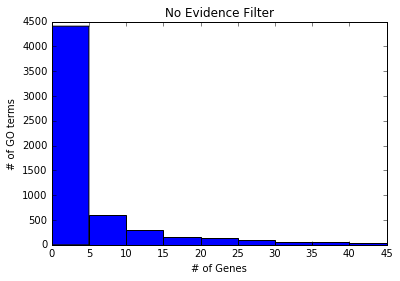

In [118]:
GO_terms = get_go_terms_descendants(biomart_file_path, gene2go_file_path, gene_count_file_path, srchhelp)
print_histogram2(GO_terms, 'No Evidence Filter', bin_range=range(0,50,5))

## GO descendants, Exp Evidence Only

10176 GO terms associated with human NCBI Entrez GeneIDs


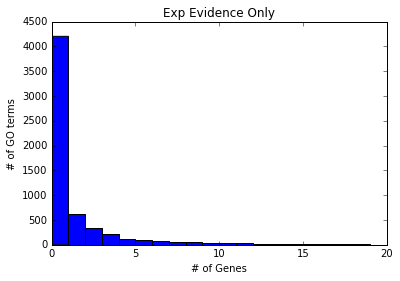

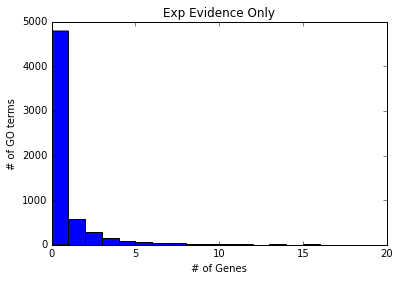

In [122]:
GO_terms_exp = get_go_terms_descendants(biomart_file_path, gene2go_file_path, gene_count_file_path, srchhelp, ev_codes=exp_ev_codes)
print_histogram2(GO_terms_exp, 'With Descendants, Exp Evidence Only', bin_range=range(0,20,1))
print_histogram(evidence_GO_terms, 'No Descendants, Exp Evidence Only', bin_range=range(0,20,1))